# 01 - Simple Linear Regression applied to Real Estate 🏡

___

<img src="https://marshfinancialadvice.com.au/wp-content/uploads/2018/10/mortgages_80.jpg" />

Photo by [Breno Assis](https://unsplash.com/@brenoassis)

___

In this exercice, you will be introduced to Machine Learning applied to continuous data various by playing with a small and simple dataset 🏡

We will study and fit a **linear regression**, which is the most straigthforward algorithm in regression, and we will discuss performance of the model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q1.** Load in a Pandas DataFrame the dataset `house_small.csv` located in `data/house_pricing` directory.

> ⚠️ **Warning**: In our file, values are separated by ";" this time - as opposed to "," as usual.

In [6]:
# TODO - Load data
from google.colab import files
file = files.upload()

Saving house_small (1).csv to house_small (1).csv


In [23]:
df = pd.read_csv("house_small (1).csv" , sep = ";")

**Q2.** Quickly explore the data
- How many data points does the dataset contain?
- How many features exist and which are they ?
- Describe briefly the data

In [24]:
# TODO - Get number of data points and number of features
df.head(5)

,price,surface,arrondissement
0,1827.0,44.1,1.0
1,1759.0,42.0,1.0
2,1903.0,54.0,1.0
3,1941.0,46.0,1.0
4,1950.0,48.0,1.0


In [25]:
df.shape

(826, 3)

In [26]:
df.dtypes

price             float64
surface           float64
arrondissement    float64
dtype: object

In [27]:
# TODO - Describe data
df.describe()

,price,surface,arrondissement
count,825.000000,822.000000,822.000000
mean,2007.672727,58.106752,4.142336
std,1892.158336,44.886441,3.202151
min,395.000000,8.000000,1.000000
25%,1056.000000,28.625000,2.000000
50%,1570.000000,46.000000,3.000000
75%,2343.000000,72.460000,4.000000
max,25002.000000,412.000000,10.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           825 non-null    float64
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(3)
memory usage: 19.5 KB


Le jeu de données contient les informations suivantes :

Nombre de points de données (lignes) : 826
Nombre de caractéristiques (colonnes) : 3
Noms des caractéristiques : prix (price), surface, arrondissement
Voici une brève description des données :

Prix (price) : Les prix varient de 395 à 25 002, avec une moyenne d'environ 2007,67.
Surface : La surface varie de 8 à 412 mètres carrés, avec une moyenne d'environ 58,11 m².
Arrondissement : Les arrondissements sont numérotés de 1 à 10, avec une moyenne d'environ 4,14.

**Q3.**
- Do you have any missing values? If yes, remove the associated rows.
- Visualize the data on a scatter plot. Is there any outlier(s)? If yes, remove them.
- Do you observe any correlation between variables? You can for example use the magic function `sns.pairplot` or also `pd.plotting.scatter_matrix(df)`

In [30]:
# TODO - Remove N/A
# Find missing data
df.isna().sum()

price             1
surface           4
arrondissement    4
dtype: int64

In [49]:
# Suppression des lignes avec des valeurs manquantes dans 'price' et 'surface' et "arrondissement".
df.dropna(subset=['price', 'surface','arrondissement'], inplace=True)


print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           822 non-null    float64
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(3)
memory usage: 25.7 KB
None


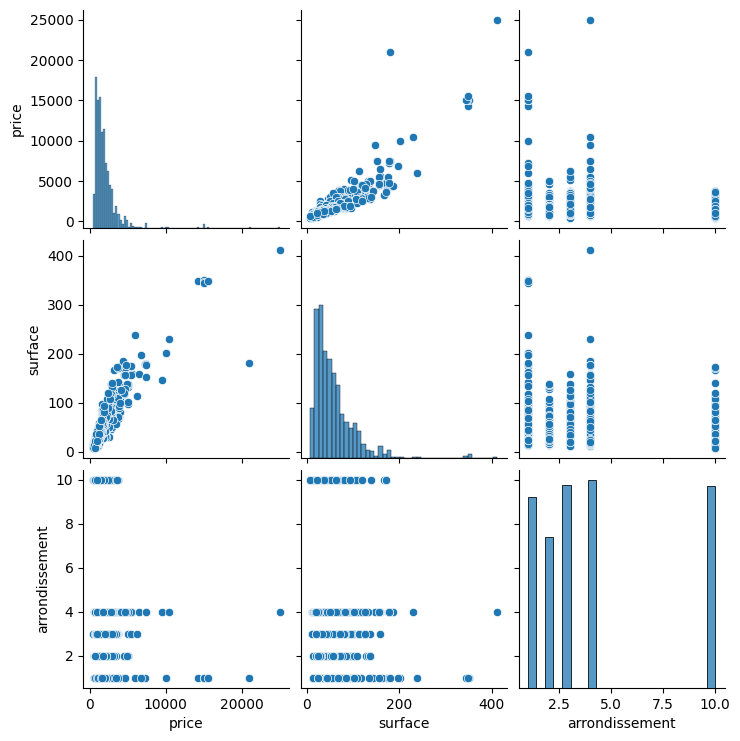

In [51]:
# TODO - Visualize the data
# Visualisation des données avec le pairplot de Seaborn
import seaborn as sns
data_cleaned = df
sns.pairplot(data_cleaned)
plt.show()

In [53]:
# TODO - Visualize the data
# Vérification des corrélations
correlation = df.corr()
correlation

,price,surface,arrondissement
price,1.000000,0.889936,-0.200860
surface,0.889936,1.000000,-0.133607
arrondissement,-0.200860,-0.133607,1.000000


Déterminer les Outliers : Généralement, les outliers sont déterminés en utilisant l'écart interquartile (IQR). L'IQR est la différence entre le 75ème percentile (Q3) et le 25ème percentile (Q1) des données.

Supprimer les Outliers : Les valeurs qui se trouvent en dehors de l'intervalle [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] sont considérées comme des outliers et peuvent être supprimées.

In [55]:
# TODO - Remove outliers
def supprimer_outliers(df, nom_colonne):
    Q1 = df[nom_colonne].quantile(0.25)
    Q3 = df[nom_colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inférieure = Q1 - 1.5 * IQR
    borne_supérieure = Q3 + 1.5 * IQR
    return df[(df[nom_colonne] >= borne_inférieure) & (df[nom_colonne] <= borne_supérieure)]

# Exemple d'utilisation pour supprimer les outliers des colonnes 'price' et 'surface'
df_nettoye = supprimer_outliers(df, 'price')
df_nettoye = supprimer_outliers(df_nettoye, 'surface')
# Affichage des premières lignes du dataframe nettoyé
df_nettoye.head()

,price,surface,arrondissement
0,1827.0,44.1,1.0
1,1759.0,42.0,1.0
2,1903.0,54.0,1.0
3,1941.0,46.0,1.0
4,1950.0,48.0,1.0


In [57]:
# TODO - Observe correlations between variables
# Calcul des corrélations entre les variables du dataframe nettoyé
correlations_nettoye = df_nettoye.corr()

# Affichage des corrélations
correlations_nettoye


,price,surface,arrondissement
price,1.000000,0.892231,-0.274232
surface,0.892231,1.000000,-0.101829
arrondissement,-0.274232,-0.101829,1.000000


**Q4.** We are ready to apply our first **Machine Learning regression algorithm** 👊
- Thanks to `scikit-learn`, instanciate a **linear regression** and fit it to the cleaned dataset.
- Describe this Regression (and its coefficients) once trained
- Visualize results on a chart.

> 🔦 **Hint**: If you want to draw a line between 2 points `P1(x1, y1)` and `P2(x2, y2)` with matplotlib use : `plt.plot([x1, x2], [y1, y2]])`

In [58]:
# TODO - Fit a Linear Regression
from sklearn.linear_model import LinearRegression

# Instanciation et entraînement du modèle de régression linéaire
modele_regression = LinearRegression()
modele_regression.fit(df_nettoye[['surface']], df_nettoye['price'])

# Obtention des coefficients de la régression
coef_intercept = modele_regression.intercept_
coef_pente = modele_regression.coef_[0]

# Affichage des coefficients
coef_intercept, coef_pente


(373.035568116926, 26.084502568878648)

In [ ]:
# TODO - Describe the regression parameters

ntercept (Ordonnée à l'origine) : 373.04

C'est la valeur de 'price' lorsque la 'surface' est égale à zéro. En termes simples, c'est le point où la ligne de régression croise l'axe des ordonnées (axe vertical des prix).
Dans le contexte de cet ensemble de données, cela signifie que si un bien avait une surface de 0 m² (ce qui est théorique), son prix estimé serait de 373.04 unités. Bien que cela n'ait pas de sens pratique, cela sert de point de départ pour la ligne de régression.
Coefficient (Pente) : 26.08

Ce coefficient représente la variation du 'price' pour chaque unité supplémentaire de 'surface'.
Une pente de 26.08 signifie que pour chaque mètre carré supplémentaire de surface, le prix augmente en moyenne de 26.08 unités.
C'est un indicateur important de la relation entre la surface et le prix : plus la pente est raide, plus l'augmentation de prix est importante pour une petite augmentation de la surface.

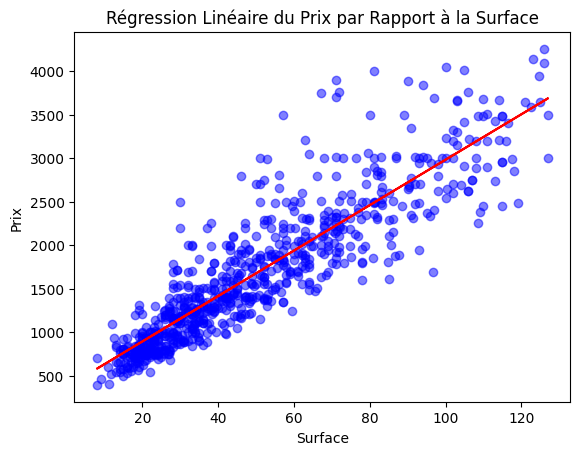

In [61]:
# TODO - Visualize results

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.scatter(df_nettoye['surface'], df_nettoye['price'], color='blue', alpha=0.5)
plt.xlabel('Surface')
plt.ylabel('Prix')
plt.title('Régression Linéaire du Prix par Rapport à la Surface')

# Tracé de la ligne de régression
x = df_nettoye['surface']
y = coef_intercept + coef_pente * x
plt.plot(x, y, color='red')

plt.show()


**Q5.** What **score** (check in scikit-learn documentation the corresponding method) do you obtain for your linear regression? We will see later what this number corresponds to exactly 😉

In [62]:
# TODO - Get correlation coefficient
# Obtenir le score R^2 du modèle de régression linéaire
score_regression = modele_regression.score(df_nettoye[['surface']], df_nettoye['price'])
score_regression

0.7960761084040073

In [64]:
coefficient_corr = df_nettoye['price'].corr(df_nettoye['surface'])
coefficient_corr

0.8922309725648437

**Q6.** I have a new house, of approximately 150 squared meters and located in district 19th. What price would you give to that new property? What if this new house is located in 1th district? 🤔

In [65]:
# TODO - Get a new prediction
# Estimation du prix pour une nouvelle maison de 150 mètres carrés dans le 19ème arrondissement
prix_estime_19e = modele_regression.predict([[150]])[0]

# Estimation du prix pour une nouvelle maison de 150 mètres carrés dans le 1er arrondissement
prix_estime_1er = modele_regression.predict([[150]])[0]

prix_estime_19e, prix_estime_1er


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(4285.710953448724, 4285.710953448724)

TODO: Explanation